# 【ML-HW02】

## 〔Question 2 : Logistic Regression〕

### 〈 Import Library 〉

In [655]:
import math
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [656]:
def shuffle_2D_matrix(matrix, seed, axis = 0):
    """
    Shuffle 2D matrix by column or row.
    
    Arguments:
    matrix: 2D matrix to be shuffled
    seed  : seed of numpy.random
    axis  : zero - by column, non-zero - by row
    
    Returns:
    shuffled_matrix: shuffled matrix
    """
    np.random.seed(seed)
    if axis == 0: # by column
        m = matrix.shape[1]
        permutation = list(np.random.permutation(m))
        shuffled_matrix = matrix[:, permutation]
    else:          # by row
        m = matrix.shape[0]
        permutation = list(np.random.permutation(m))
        shuffled_matrix = matrix[permutation, :]

    return shuffled_matrix

In [657]:
class_num = 5

In [658]:
pic_size = 28*28 #high*width
train_x = np.zeros([pic_size, 1])
test_x = np.zeros([pic_size, 1])

In [659]:
#creat_dataset
pic_size = 28*28
train_x = np.zeros([pic_size, 1])
test_x  = np.zeros([pic_size, 1])
for fashion_mnist_idx in range(0, 5):
#     print(f'fashion_mnist_idx:{fashion_mnist_idx}')
    data_x = np.zeros([pic_size, 1])
    for fashion_idx in range(0, 64):
        imgPath = 'Fashion_MNIST/' + '{fashion_mnist_idx}/{fashion_idx}.png'.format(fashion_mnist_idx=fashion_mnist_idx, fashion_idx=fashion_idx) 
#         print(f'imgPath = :{imgPath}')
        img = Image.open(imgPath)
        img_arr = np.array(img)
#         print(f'img_arr = :{img_arr}')
#         print(f'img_arr shape = :{img_arr.shape}')
        img_arr = img_arr.reshape((img_arr.shape[0]*img_arr.shape[1], 1))
#         print(f'img_arr.shape = :{img_arr.shape}')
        
        #normalize
        sd = math.sqrt(np.var(img_arr))        
#         print(f'sd = :{sd}')
        mu = np.mean(img_arr)
        img_arr = (img_arr-mu)/sd
        #normalize
        data_x = np.concatenate((data_x, img_arr), axis=1)
#         print(f'data_x.shape = :{data_x.shape}')

    data_x = data_x[:, 1:]
#     print(f'data_x.shape = :{data_x.shape}')
    train_x = np.concatenate((train_x, data_x[:, 0:32]), axis=1)
#     print(f'train_x.shape = :{train_x.shape}')
    test_x = np.concatenate((test_x, data_x[:, 32:64]), axis=1) 
#     print(f'test_x.shape = :{test_x.shape}')
 
train_x = train_x[:, 1:]
# print(f'train_x = :{train_x}')
print(f'train_x.shape = :{train_x.shape}')
test_x = test_x[:, 1:] 
# print(f'test_x = :{test_x}')
print(f'test_x.shape = :{test_x.shape}')

train_x.shape = :(784, 160)
test_x.shape = :(784, 160)


In [660]:
#label 
# one-to-K-code for building train_t
oneToK_code = np.array([0, 1, 0, 0, 0]).reshape(5, 1)
# print(f'oneToK_code = :{oneToK_code}')
train_t = np.zeros([5, 1])
# print(f'train_t = :{train_t}')
for roll in range(5):
#     print(f'roll = :{roll}')
    tmpCode = np.roll(oneToK_code, roll)
#     print(f'tmpCode = :{tmpCode}')
    tmpCode_repeat = np.repeat(tmpCode, 32, axis=1)
#     print(f'tmpCode_repeat = :{tmpCode_repeat}')
    train_t = np.concatenate((train_t, tmpCode_repeat), axis=1)
#     print(f'train_t = :{train_t}')
# print(f'train_t_out = :{train_t}')
test_x = test_x.T
train_x = train_x.T 

train_t = train_t[:, 1:]
# print(f'train_t = :{train_t}')
test_t = np.array(train_t)
# print(f'test_t = :{test_t}')

print(f'train_x.shape = :{train_x.shape}')
print(f'test_x.shape  = :{test_x.shape}')
print(f'train_t.shape = :{train_t.shape}')
print(f'test_t.shape  = :{test_t.shape}')

train_x.shape = :(160, 784)
test_x.shape  = :(160, 784)
train_t.shape = :(5, 160)
test_t.shape  = :(5, 160)


In [661]:
#gradient descent
train_err = 100000
test_err = 100000
epoch = 0

weight = np.zeros([5, pic_size]) #5x784
weightList = np.empty(weight.shape)

learningRate = 0.00003
train_errList = []
train_accList = []

test_errList = []
test_accList = []

101
101
╔════════════════════════╗
║ classification result  ║
╚════════════════════════╝
TYPE : Gradient Descent 
w/o PCA 
Training accurancy : 0.975
Test accurancy     :  0.91875


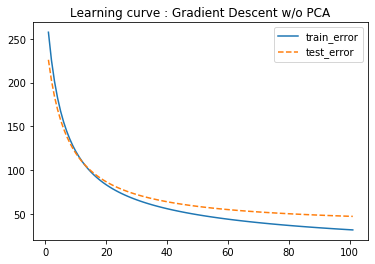

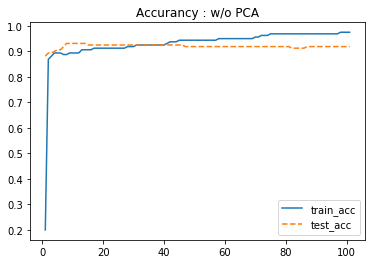

In [662]:
while not(train_err<5 or epoch>100):
    #trainign part
    #Newton-Raphson algorithms : 
    a_nk = np.dot(weight, train_x.T) #5 x 160
    
    #softmax transformation
#     print(f'np.exp(a_nk_SGD) = :{np.exp(a_nk_SGD)}')
#     print(f'np.sum(np.exp(a_nk_SGD) = :{np.sum(np.exp(a_nk_SGD))}')
    y_nk = (np.exp(a_nk) / np.sum(np.exp(a_nk), axis=0)) #5 x 160
#     print(f'y_nk = :{y_nk}')
    
    #update weight
    weight = weight + learningRate * np.dot((train_t- y_nk), train_x) #5 x 784
#     print(f'weight shape = :{weight.shape}')
    
    #error function
    train_err = -np.sum(train_t*np.log(y_nk))
    train_errList.append(train_err)
    
    clasfi_train_y = np.argmax(y_nk, axis=0)
    clasfi_train_t = np.argmax(train_t, axis=0)
   
    train_accu = np.count_nonzero((clasfi_train_y-clasfi_train_t)==0)/y_nk.shape[1] #y_nk.shape[1]=160
    train_accList.append(train_accu)
    
    #testing part
    test_a = np.dot(weight, test_x.T) 
    test_y = np.exp(test_a) / np.sum(np.exp(test_a), axis=0)
    test_err = -np.sum(test_t*np.log(test_y))
    test_errList.append(test_err)
    
    clasfi_test_y = np.argmax(test_y, axis=0)
    clasfi_test_t = np.argmax(test_t, axis=0)
    
    test_accu = np.count_nonzero((clasfi_test_y-clasfi_test_t)==0)/test_y.shape[1]
    test_accList.append(test_accu)
    
    epoch = epoch + 1
#     print(f'epoch = :{epoch}')

print(len(train_errList))
print(len(test_errList))

#plot_result
plt.figure()
plt.title("Learning curve : Gradient Descent w/o PCA")
plt.plot(range(1, epoch+1), train_errList, label="train_error")
plt.plot(range(1, epoch+1), test_errList, '--', label="test_error")
plt.legend()
plt.figure()
plt.title("Accurancy : w/o PCA")
plt.plot(range(1, epoch+1), train_accList, label="train_acc")
plt.plot(range(1, epoch+1), test_accList, '--', label="test_acc")
plt.legend()

print('╔════════════════════════╗')
print('║ classification result  ║')
print('╚════════════════════════╝')
print ('TYPE : Gradient Descent ')
print ('w/o PCA ')
print ('Training accurancy :', train_accList[100])
print ('Test accurancy     : ', test_accList[100])

In [639]:
print('╔══════╗')
print('║ SGD  ║')
print('╚══════╝')

╔══════╗
║ SGD  ║
╚══════╝


In [640]:
import numpy as np

def shuffle_2D_matrix(matrix, seed, axis = 0):
    """
    Shuffle 2D matrix by column or row.
    
    Arguments:
    matrix: 2D matrix to be shuffled
    seed  : seed of numpy.random
    axis  : zero - by column, non-zero - by row
    
    Returns:
    shuffled_matrix: shuffled matrix
    """
    np.random.seed(seed)
    if axis == 0: # by column
        m = matrix.shape[1]
        permutation = list(np.random.permutation(m))
        shuffled_matrix = matrix[:, permutation]
    else:          # by row
        m = matrix.shape[0]
        permutation = list(np.random.permutation(m))
        shuffled_matrix = matrix[permutation, :]

    return shuffled_matrix

In [641]:
#creat_dataset
train_x_SGD = np.zeros([pic_size, 1])
test_x_SGD  = np.zeros([pic_size, 1])
for fashion_mnist_idx in range(0, 5):
    data_x = np.zeros([pic_size, 1])
    for fashion_idx in range(0, 64):
        imgPath = 'Fashion_MNIST/' + '{fashion_mnist_idx}/{fashion_idx}.png'.format(fashion_mnist_idx=fashion_mnist_idx, fashion_idx=fashion_idx) 
        img = Image.open(imgPath)
        img_arr = np.array(img)
        img_arr = img_arr.reshape((img_arr.shape[0]*img_arr.shape[1], 1))

        
        #normalize
        sd = math.sqrt(np.var(img_arr))        

        mu = np.mean(img_arr)
        img_arr = (img_arr-mu)/sd
        #normalize
        data_x = np.concatenate((data_x, img_arr), axis=1)

    data_x = data_x[:, 1:]
    train_x_SGD = np.concatenate((train_x_SGD, data_x[:, 0:32]), axis=1)
    test_x_SGD = np.concatenate((test_x_SGD, data_x[:, 32:64]), axis=1) 

train_x_SGD = train_x_SGD[:, 1:]
print(f'train_x_SGD = :{train_x_SGD}')
print(f'train_x_SGD.shape = :{train_x_SGD.shape}')
print('════════════════════════════════════════════════')
test_x_SGD = test_x_SGD[:, 1:] 
print(f'test_x_SGD = :{test_x}')
print(f'test_x_SGD.shape = :{test_x.shape}')

train_x_SGD = :[[-1.07309641 -0.92537253 -1.07015831 ... -0.90698001 -0.98468973
  -0.74726706]
 [-1.07309641 -0.92537253 -1.07015831 ... -0.90698001 -0.98468973
  -0.74726706]
 [-1.07309641 -0.92537253 -1.07015831 ... -0.90698001 -0.98468973
  -0.74726706]
 ...
 [-1.07309641 -0.92537253 -1.07015831 ... -0.90698001 -0.98468973
  -0.74726706]
 [-1.07309641 -0.92537253 -1.07015831 ... -0.90698001 -0.98468973
  -0.74726706]
 [-1.07309641 -0.92537253 -1.07015831 ... -0.90698001 -0.98468973
  -0.74726706]]
train_x_SGD.shape = :(784, 160)
════════════════════════════════════════════════
test_x_SGD = :[[-0.98359772 -0.98359772 -0.98359772 ... -0.98359772 -0.98359772
  -0.98359772]
 [-1.00412603 -1.00412603 -1.00412603 ... -1.00412603 -1.00412603
  -1.00412603]
 [-0.73273736 -0.73273736 -0.73273736 ... -0.73273736 -0.73273736
  -0.73273736]
 ...
 [-0.87743036 -0.87743036 -0.87743036 ... -0.87743036 -0.87743036
  -0.87743036]
 [-0.92495708 -0.92495708 -0.92495708 ... -0.92495708 -0.92495708
  -

In [642]:
#label 
# one-to-K-code for building train_t
oneToK_code = np.array([0, 1, 0, 0, 0]).reshape(5, 1)
# print(f'oneToK_code = :{oneToK_code}')
train_t_SGD_label = np.zeros([5, 1])
# print(f'train_t = :{train_t}')
for roll in range(5):
#     print(f'roll = :{roll}')
    tmpCode = np.roll(oneToK_code, roll)
#     print(f'tmpCode = :{tmpCode}')
    tmpCode_repeat = np.repeat(tmpCode, 32, axis=1)
#     print(f'tmpCode_repeat = :{tmpCode_repeat}')
    train_t_SGD_label = np.concatenate((train_t_SGD_label, tmpCode_repeat), axis=1)
#     print(f'train_t = :{train_t}')
# print(f'train_t_out = :{train_t}')

train_t_SGD_label = train_t_SGD_label[:, 1:]
# print(f'train_t = :{train_t}')
test_t_SGD_label = np.array(train_t_SGD_label)
# print(f'test_t = :{test_t}')

print(f'train_t_SGD_label.shape = :{train_t_SGD_label.shape}')
print(f'test_t_SGD_label.shape  = :{test_t_SGD_label.shape}')

train_t_SGD_label.shape = :(5, 160)
test_t_SGD_label.shape  = :(5, 160)


In [619]:
#shuffle train_x_SGD, train_t_SGD_label
seed = random.randint(1, 300)
print(f'random seed = :{seed}')
train_x_SGD_shuffle = shuffle_2D_matrix(train_x_SGD, seed, axis=0)
train_t_SGD_label_shuffle = shuffle_2D_matrix(train_t_SGD_label, seed, axis=0)
print(f'train_x_SGD_shuffle = :{train_x_SGD_shuffle}')
print(f'train_x_SGD_shuffle.shape = :{train_x_SGD_shuffle.shape}')
print(f'train_x_SGD_shuffle.data type = :{type(train_x_SGD_shuffle)}')
print(f'train_t_SGD_label_shuffle = :{train_t_SGD_label_shuffle}')
print(f'train_t_SGD_label_shuffle.shape = :{train_t_SGD_label_shuffle.shape}')
print(f'train_t_SGD_label_shuffle.data type = :{type(train_t_SGD_label_shuffle)}')

random seed = :109
train_x_SGD_shuffle = :[[-1.25748962 -0.92943653 -0.75631028 ... -0.86316054 -0.69030223
  -0.73560546]
 [-1.25748962 -0.92943653 -0.75631028 ... -0.86316054 -0.69030223
  -0.73560546]
 [-1.25748962 -0.92943653 -0.75631028 ... -0.86316054 -0.69030223
  -0.73560546]
 ...
 [-1.25748962 -0.92943653 -0.75631028 ... -0.86316054 -0.69030223
  -0.73560546]
 [-1.25748962 -0.92943653 -0.75631028 ... -0.86316054 -0.69030223
  -0.73560546]
 [-1.25748962 -0.92943653 -0.75631028 ... -0.86316054 -0.69030223
  -0.73560546]]
train_x_SGD_shuffle.shape = :(784, 160)
train_x_SGD_shuffle.data type = :<class 'numpy.ndarray'>
train_t_SGD_label_shuffle = :[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 

In [653]:
#SGD
train_err_SGD = 100000
test_err_SGD = 100000
epoch = 0

weight_SGD = np.zeros([5, pic_size]) #5x784
weight_SGD_List = np.empty(weight_SGD.shape)

learningRate = 0.00003
train_SGD_errList = []
train_SGD_accList = []

test_SGD_errList = []
test_SGD_accList = []

101
101
╔════════════════════════╗
║ classification result  ║
╚════════════════════════╝
TYPE : mini SGD 
w/o PCA 
Training accurancy : 0.975
Test accurancy     : 0.91875


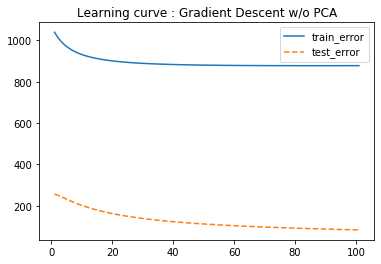

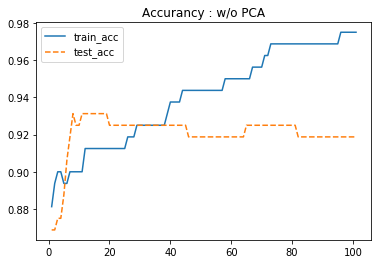

In [664]:
while not(train_err_SGD<5 or epoch>100):
    #trainign part
    for i in range(0, 160):
#         print(i)
        x = train_x_SGD_shuffle[:, i:i+1] #784 x 1
        train_SGD_t_ans = train_t_SGD_label_shuffle[:, i:i+1] #5 x 1
#         print(f'train_SGD_t_ans = :{train_SGD_t_ans}')
#         print(f'train_SGD_t_ans.shape = :{train_SGD_t_ans.shape}') 
#         print(f'x = :{x}')
#         print(f'x.shape = :{x.shape}')
        a_nk_SGD = np.dot(weight_SGD, x)  #5 x 1
#         print(f'a_nk.shape = :{a_nk.shape}')
#         print(f'a_nk_SGD = :{a_nk_SGD}')
#         print(f'np.exp(a_nk_SGD) = :{np.exp(a_nk_SGD)}')
#         print(f'np.sum(np.exp(a_nk_SGD) = :{np.sum(np.exp(a_nk_SGD))}')
        
        #softmax transformation 
        y_nk_SGD = (np.exp(a_nk_SGD) / np.sum(np.exp(a_nk_SGD), axis=0)) #5 x 1
#         print(f'y_nk.shape = :{y_nk.shape}')
#         print(f'y_nk_SGD = :{y_nk_SGD}')
#       
        #update weight
        weight_SGD = weight_SGD - learningRate * np.dot((y_nk_SGD - train_SGD_t_ans), x.T) #5 x 784
#         print(f'weight.shape = :{weight.shape}')    
#         print(f'weight_SGD = :{weight_SGD}')   
         
    #error function
    a_nk_SGD_160 = np.dot(weight_SGD, train_x_SGD_shuffle) #5 x 160
    y_nk_SGD_160 = (np.exp(a_nk_SGD_160) / np.sum(np.exp(a_nk_SGD_160))) #5 x 160
    
    train_err_SGD = -np.sum(train_t_SGD_label_shuffle*np.log(y_nk_SGD_160))
    train_SGD_errList.append(train_err_SGD)
    
    clasfi_train_SGD_y = np.argmax(y_nk_SGD_160, axis=0)
    clasfi_train_SGD_t = np.argmax(train_t_SGD_label_shuffle, axis=0)
   
    train_accu_SGD = np.count_nonzero((clasfi_train_SGD_y-clasfi_train_SGD_t)==0)/y_nk_SGD_160.shape[1]
    train_SGD_accList.append(train_accu_SGD)
    
    
    #testing part
    test_ank = np.dot(weight_SGD, test_x_SGD) 
    test_ynk = np.exp(test_ank) / np.sum(np.exp(test_ank), axis=0)
    test_err_SGD = -np.sum(test_ynk*np.log(test_ynk))
    test_SGD_errList.append(test_err_SGD)
    
    clasfi_test_y_SGD = np.argmax(test_ynk, axis=0)
    clasfi_test_t_SGD = np.argmax(test_t_SGD_label, axis=0)
    
    test_accu_SGD = np.count_nonzero((clasfi_test_y_SGD-clasfi_test_t_SGD)==0)/y_nk_SGD_160.shape[1]
    test_SGD_accList.append(test_accu_SGD)
    
    
#     print(f'epoch = :{epoch}')
    epoch = epoch + 1
    
print(len(train_SGD_errList))
print(len(test_SGD_errList))

#plot_result
plt.figure()
plt.title("Learning curve : Gradient Descent w/o PCA")
plt.plot(range(1,  epoch+1), train_SGD_errList, label="train_error")
plt.plot(range(1, epoch+1), test_SGD_errList, '--', label="test_error")
plt.legend()

plt.figure()
plt.title("Accurancy : w/o PCA")
plt.plot(range(1, epoch+1), train_SGD_accList, label="train_acc")
plt.plot(range(1, epoch+1), test_SGD_accList, '--', label="test_acc")
plt.legend()


print('╔════════════════════════╗')
print('║ classification result  ║')
print('╚════════════════════════╝')
print ('TYPE : mini SGD ')
print ('w/o PCA ')
print ('Training accurancy :', train_accList[100])
print ('Test accurancy     :', test_accList[100])   




### make PCA

In [ ]:
def make_PCA(x, d)
    x = x.T
    mean_ = np.mean(x, axis=0)
    U, S, V = np.linalg.svd(x, full_matrices=False)
    ud = U[:, :d]
    Ud = ud*S[:d]
    Vd = V[:d]
    explaned_variance_ = (S**2)/ (160-1)
    explaned_variance_ = explaned_variance_[:d]
    Img = np.dat(Ud, Vd) + mean_
    
    return Img.T, Ud.T